In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv("C:/Users/ncmia/OneDrive/Desktop/Depression_Student_Dataset_Unclean.csv")
data.head()

,ID,Gender,Age,Academic Pressure,Sleep Duration,Dietary Habits,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,Male,28.0,2.0,7-8 hours,Moderate,9.0,2.0,Yes,No
1,2,Male,28.0,NaN,5-6 hours,Healthy,7.0,NaN,Yes,No
2,3,Male,25.0,1.0,5-6 hours,Unhealthy,10.0,4.0,No,Yes
3,4,Male,23.0,1.0,More than 8 hours,Unhealthy,7.0,2.0,Yes,No
4,5,Female,31.0,1.0,More than 8 hours,Healthy,4.0,2.0,Yes,No



This dataset contains information about students and various factors that might influence their mental health, particularly focusing on depression. The dataset includes demographic details, lifestyle habits, academic stress levels, and family history of mental illness.

In [3]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
ID                                   0
Gender                               0
Age                                 50
Academic Pressure                   56
Sleep Duration                      15
Dietary Habits                      10
Study Hours                         52
Financial Stress                    52
Family History of Mental Illness    13
Depression                           0
dtype: int64


In [4]:
numerical_columns = ['Age', 'Academic Pressure', 'Study Hours', 'Financial Stress']

mean_values = data[numerical_columns].mean()

data[numerical_columns] = data[numerical_columns].fillna(mean_values)
print(data.isnull().sum())

ID                                   0
Gender                               0
Age                                  0
Academic Pressure                    0
Sleep Duration                      15
Dietary Habits                      10
Study Hours                          0
Financial Stress                     0
Family History of Mental Illness    13
Depression                           0
dtype: int64


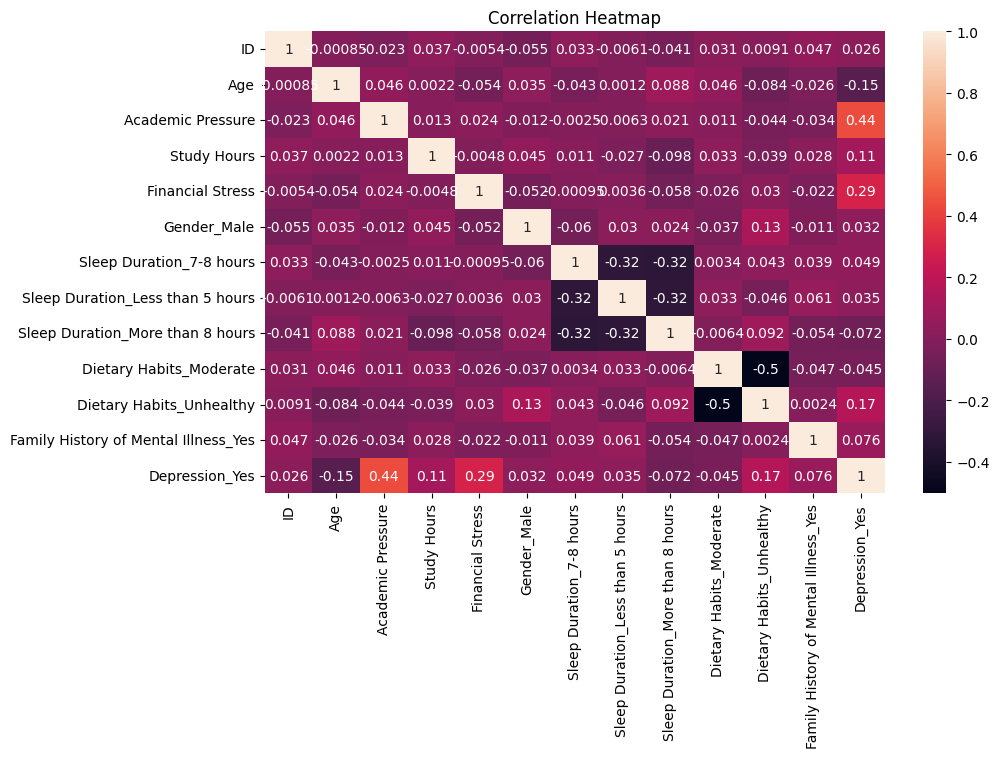

: 

In [ ]:
data = pd.get_dummies(data, drop_first=True)
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [6]:
categorical_columns = data.select_dtypes(include='object').columns

for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

print(data.isnull().sum())


ID                                      0
Age                                     0
Academic Pressure                       0
Study Hours                             0
Financial Stress                        0
Gender_Male                             0
Sleep Duration_7-8 hours                0
Sleep Duration_Less than 5 hours        0
Sleep Duration_More than 8 hours        0
Dietary Habits_Moderate                 0
Dietary Habits_Unhealthy                0
Family History of Mental Illness_Yes    0
Depression_Yes                          0
dtype: int64


In [7]:
independent_var = data['Study Hours']
dependent_var = data['Academic Pressure']

In [8]:
features = ["Study Hours"]
X = data[features]
y = data["Academic Pressure"]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42) 

In [9]:
# Step 6: Shape of the train and testsets
print("\nShape of Training Set:", X_train.shape, y_train.shape)
print("Shape of Testing Set:", X_test.shape, y_test.shape)


Shape of Training Set: (401, 1) (401,)
Shape of Testing Set: (101, 1) (101,)


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Step 8: Retrieve the intercept (b0)
intercept = model.intercept_
print("\nIntercept (b0):", intercept)


Intercept (b0): 2.8878046752867705


In [12]:
# Step 9: Retrieve the slope (b1)
slope = model.coef_[0]
print("Slope (b1):", slope)

Slope (b1): 0.007439925054950429


In [13]:
# Step 10: Predicted values
y_pred = model.predict(X_test)

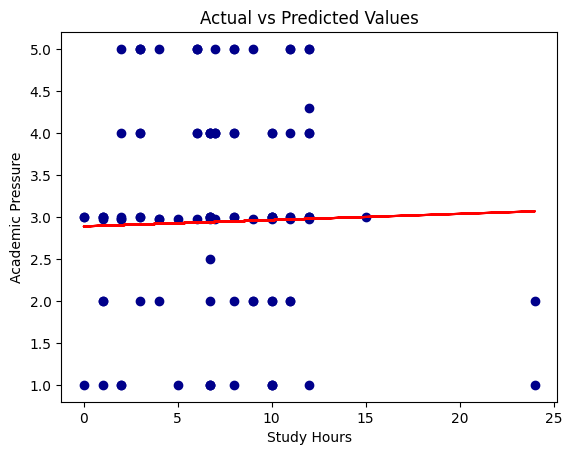

In [26]:
# Step 11: Actual vs Predicted values visualization
plt.scatter(X_test, y_test, color='darkblue')
plt.plot(X_test, y_pred, color='red')
plt.title("Actual vs Predicted Values")
plt.xlabel("Study Hours")
plt.ylabel("Academic Pressure")
plt.show()

In [15]:
# Step 12: Evaluate the algorithm
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Evaluation:")
print("Mean Squared Error (MSE):", mse)
print("R-squared Score (R²):", r2)


Model Evaluation:
Mean Squared Error (MSE): 1.5438182084804286
R-squared Score (R²): -0.019934249612236554
